In [ ]:
# 学習データに含まれるラベルを収集し、分類クラス数を確認する
# モデルの出力層（nn.Linear の出力次元）を決めるために必要

import os
import glob

# 1階層上の data/train を指定
root_dir = "../data/train"

print("存在確認:", os.path.exists(root_dir))

# クラスごとのフォルダ内のPNGファイルを取得
image_paths = glob.glob(os.path.join(root_dir, "*", "*.png"))

print(f"画像枚数: {len(image_paths)} 枚")

if image_paths:
    labels = [int(os.path.basename(os.path.dirname(p))) for p in image_paths]
    print(f"クラス数: {len(set(labels))} クラス")
    print(f"例: {image_paths[0]} → ラベル {labels[0]}")
else:
    print("画像が見つかりませんでした。")


存在確認: True
画像枚数: 39209 枚
クラス数: 43 クラス
例: ../data/train/6/00006_00013_00018.png → ラベル 6


0      210
1     2220
2     2250
3     1410
4     1980
5     1860
6      420
7     1440
8     1410
9     1470
10    2010
11    1320
12    2100
13    2160
14     780
15     630
16     420
17    1110
18    1200
19     210
20     360
21     330
22     390
23     510
24     270
25    1500
26     600
27     240
28     540
29     270
30     450
31     780
32     240
33     689
34     420
35    1200
36     390
37     210
38    2070
39     300
40     360
41     240
42     240
Name: count, dtype: int64


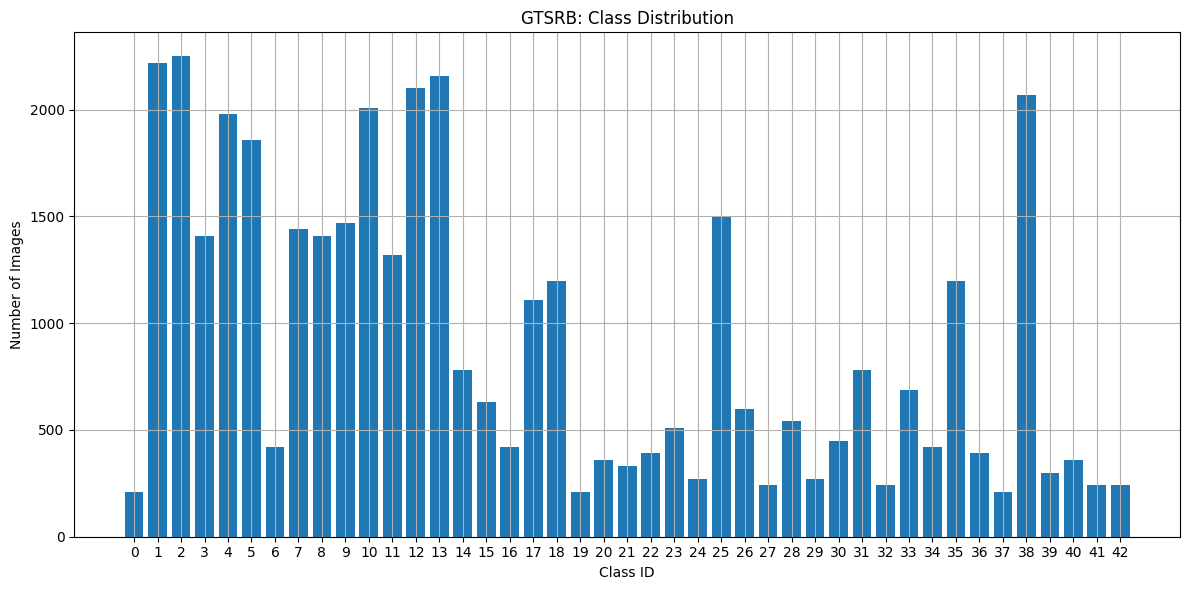

In [ ]:
# 学習するデータ数の確認
# 入力想定データでいきなりモデルを作ると、データが多いところに合わせてモデルが作成されてしまう
# そうならないために、データ数を確認する。
import pandas as pd
import matplotlib.pyplot as plt

# ラベルの分布を確認
label_series = pd.Series(labels)
label_counts = label_series.value_counts().sort_index()

# 表示
print(label_counts)

# 可視化
plt.figure(figsize=(12, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.title("GTSRB: Class Distribution")
plt.xticks(label_counts.index)
plt.grid(True)
plt.tight_layout()
plt.show()

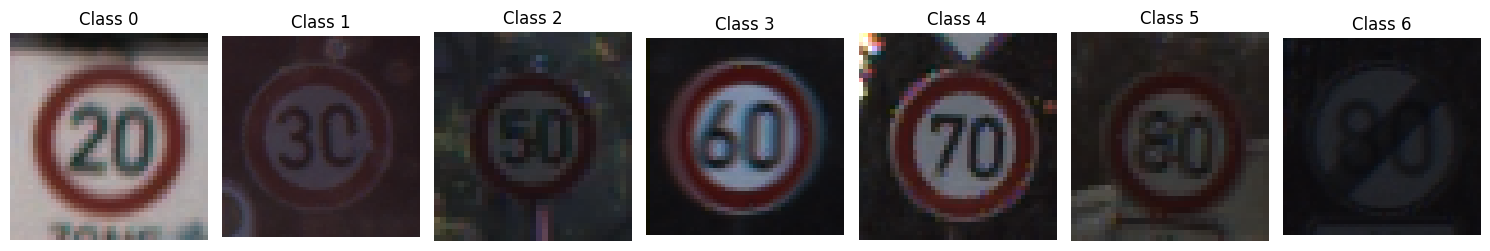

In [18]:
# 各クラスの標識画像をサンプル表示し、特徴の傾向（形・色・明るさ）を確認する
# モデルが区別しやすいかどうか、似た標識があるかどうかを人の目で確認しておく
import random
from PIL import Image
import matplotlib.pyplot as plt

# クラスごとに画像パスを集める辞書を作成
from collections import defaultdict

class_to_paths = defaultdict(list)
for path in image_paths:
    label = int(os.path.basename(os.path.dirname(path)))
    class_to_paths[label].append(path)

# 表示するクラスを指定（例：0〜5）
selected_classes = list(range(7))

# クラスごとに1枚ずつランダムに表示
plt.figure(figsize=(15, 5))
for i, cls in enumerate(selected_classes):
    sample_path = random.choice(class_to_paths[cls])
    image = Image.open(sample_path)
    plt.subplot(1, len(selected_classes), i + 1)
    plt.imshow(image)
    plt.title(f"Class {cls}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image
from collections import Counter

# 最初の1000枚くらいで確
sample_paths = image_paths[:1000]

sizes = []
for path in sample_paths:
    with Image.open(path) as img:
        sizes.append(img.size)  # (width, height)

# サイズの件数を集計
size_counts = Counter(sizes)

# 表示
print("画像サイズごとの枚数:")
for size, count in size_counts.items():
    print(f"{size}: {count} 枚")


画像サイズごとの枚数:
(40, 40): 4 枚
(32, 32): 11 枚
(39, 44): 1 枚
(43, 43): 5 枚
(38, 38): 11 枚
(38, 41): 5 枚
(49, 52): 2 枚
(52, 54): 4 枚
(46, 51): 1 枚
(35, 36): 11 枚
(51, 52): 3 枚
(31, 33): 9 枚
(31, 31): 10 枚
(29, 31): 9 枚
(36, 36): 10 枚
(33, 35): 7 枚
(55, 59): 4 枚
(28, 27): 4 枚
(37, 39): 5 枚
(42, 43): 6 枚
(39, 43): 2 枚
(30, 33): 5 枚
(36, 35): 3 枚
(27, 29): 11 枚
(57, 70): 1 枚
(36, 38): 7 枚
(50, 53): 2 枚
(34, 34): 11 枚
(48, 49): 6 枚
(51, 53): 2 枚
(54, 55): 3 枚
(69, 71): 2 枚
(41, 42): 13 枚
(39, 40): 13 枚
(31, 34): 2 枚
(47, 49): 4 枚
(63, 67): 1 枚
(62, 68): 1 枚
(47, 46): 2 枚
(30, 34): 1 枚
(50, 52): 6 枚
(54, 58): 1 枚
(34, 36): 5 枚
(45, 47): 3 枚
(41, 45): 3 枚
(58, 60): 2 枚
(32, 31): 6 枚
(41, 44): 2 枚
(52, 55): 2 枚
(26, 28): 8 枚
(37, 41): 1 枚
(26, 29): 6 枚
(57, 59): 2 枚
(33, 34): 11 枚
(72, 72): 2 枚
(35, 38): 3 枚
(76, 80): 2 枚
(49, 53): 1 枚
(59, 61): 1 枚
(32, 33): 17 枚
(30, 32): 11 枚
(68, 72): 2 枚
(29, 30): 14 枚
(44, 45): 8 枚
(51, 55): 1 枚
(27, 30): 4 枚
(33, 33): 17 枚
(37, 40): 4 枚
(42, 42): 7 枚
(29, 32)

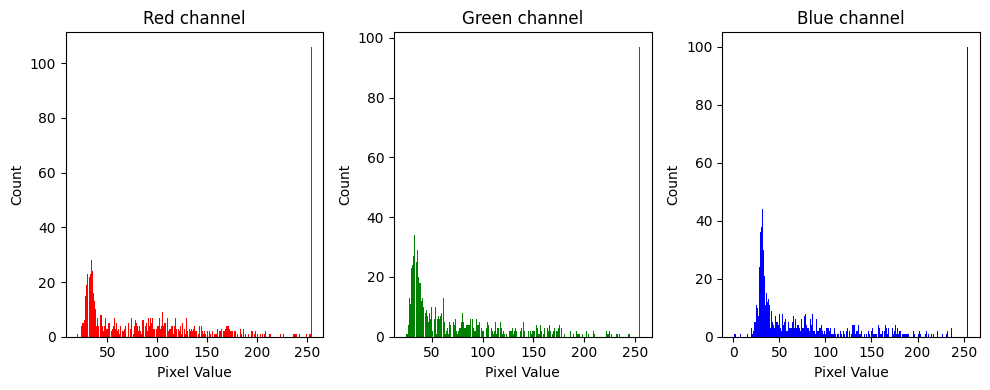

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 適当な画像を1枚読み込む（or 複数でも可）
sample_path = random.choice(image_paths)
image = Image.open(sample_path)

# RGB配列として取得
img_array = np.array(image)

# 各チャンネルごとにヒストグラムを描画
plt.figure(figsize=(10, 4))

colors = ['Red', 'Green', 'Blue']
for i in range(3):  # RGBの3チャネル
    plt.subplot(1, 3, i+1)
    plt.hist(img_array[..., i].ravel(), bins=256, color=colors[i].lower())
    plt.title(f"{colors[i]} channel")
    plt.xlabel("Pixel Value")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()
